<a href="https://colab.research.google.com/github/SankaranarayananA/ML-Major-Project/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Goal**: Create a model by given text data and perform a better guess of the sentiments by choosing  highest probable sentiment.

## Downloading and Unzipping data


In [3]:
!wget https://codeload.github.com/SankaranarayananA/ML-Major-Project/zip/refs/heads/main

--2021-05-06 16:19:17--  https://codeload.github.com/SankaranarayananA/ML-Major-Project/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main’

main                    [ <=>                ] 146.32K  --.-KB/s    in 0.01s   

2021-05-06 16:19:17 (12.0 MB/s) - ‘main’ saved [149830]



In [4]:
!unzip /content/main

Archive:  /content/main
c0816831e617be1dd89d94e844f50b0254bc20b9
   creating: ML-Major-Project-main/
  inflating: ML-Major-Project-main/Webapp.png  
   creating: ML-Major-Project-main/data/
  inflating: ML-Major-Project-main/data/amazon_cells_labelled.txt  
  inflating: ML-Major-Project-main/data/imdb_labelled.txt  
  inflating: ML-Major-Project-main/data/readme.txt  
  inflating: ML-Major-Project-main/data/yelp_labelled.txt  


## **Importing Datasets**

**Yelp.txt**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dty= pd.read_csv('/content/ML-Major-Project-main/data/yelp_labelled.txt',sep='\t',header=None)

dty.head()
# review and sentiment
# 0-> negative
# 1-> positive review


,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Assign Columns Name 

In [4]:
col_nm=['Review','Sentiment']
dty.columns = col_nm
dty.head()
# dty.shape

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Amazon.txt**

In [5]:
dta= pd.read_csv('/content/ML-Major-Project-main/data/amazon_cells_labelled.txt',sep='\t',header=None)
# review and sentiment
# 0->negative, 1-> positive for positive review
dta.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


Assign Columns Name 

In [6]:
col_nm = ['Review','Sentiment']
dta.columns = col_nm
dta.head()
dta.shape

(1000, 2)

**IMDB.txt**

In [7]:
dtim= pd.read_csv('/content/ML-Major-Project-main/data/imdb_labelled.txt',sep='\t',header=None)
# review and sentiment
# 0->negative, 1-> positive for positive review
dtim.head()

,0,1
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


Assign Columns Name

In [8]:
col_nm = ['Review','Sentiment']
dtim.columns = col_nm
dtim.head()
dtim.shape

(748, 2)

### **Mega DataSet** 
Adding sets all in one set(yelp <- amazon <- imdb)

In [9]:
data = dty.append([dta,dtim],ignore_index=True)


In [10]:
data.shape

(2748, 2)

*Distribution Of Sentiments Data*

In [11]:
 data['Sentiment'].value_counts()

1    1386
0    1362
Name: Sentiment, dtype: int64

*Null Checking*


In [12]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

Replacing 1 and 0 by Positive and Negative Respectively

In [22]:
a=data[data['Sentiment']==1]
a['Sentiment'][:] = 'Positive'
data[data['Sentiment']==1] = a

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
b=data[data['Sentiment']==0]
b['Sentiment'][:] = 'Negative'
data[data['Sentiment']==0] = b
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Review,Sentiment
0,Wow... Loved this place.,Positive
1,Crust is not good.,Negative
2,Not tasty and the texture was just nasty.,Negative
3,Stopped by during the late May bank holiday of...,Positive
4,The selection on the menu was great and so wer...,Positive


In [24]:
x = data['Review']
y = data['Sentiment']
print(x.shape)
print(y.shape)

(2748,)
(2748,)


## **Data Preprocessing/Cleaning**

Here, Stopwords, Punctuations -> **REMOVED**

Apply ***Lemmatization***


In [25]:
 import string
 punct = string.punctuation
#  punct

Stop Words

In [37]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords= list(STOP_WORDS) #list of stopwords
stopwords  #326 words

['meanwhile',
 'should',
 'again',
 'much',
 'along',
 'throughout',
 'only',
 'regarding',
 'whereby',
 'beside',
 'ca',
 'please',
 'used',
 'serious',
 'always',
 'do',
 'there',
 'am',
 'some',
 'how',
 'whole',
 'even',
 'except',
 'without',
 'really',
 'she',
 're',
 'otherwise',
 'beforehand',
 'themselves',
 'has',
 'through',
 'could',
 'go',
 'can',
 'is',
 'hundred',
 'afterwards',
 'enough',
 'would',
 'hereafter',
 'might',
 'thru',
 'beyond',
 'under',
 'onto',
 'less',
 '’d',
 'while',
 '’ve',
 'bottom',
 'former',
 'however',
 '’ll',
 'others',
 'take',
 '‘m',
 'did',
 'unless',
 'doing',
 'anyhow',
 '‘s',
 'if',
 'after',
 'such',
 'none',
 'full',
 'nor',
 'around',
 "'s",
 'since',
 'eleven',
 'with',
 'namely',
 'your',
 "n't",
 'ours',
 'more',
 'sometimes',
 'upon',
 'next',
 'than',
 'made',
 'down',
 'make',
 'until',
 '‘ll',
 'seemed',
 'yet',
 'many',
 'becomes',
 'hereby',
 'does',
 'where',
 'himself',
 'once',
 'herself',
 'thence',
 'keep',
 'seems',
 '‘d

***Data Cleaning Method***

In [38]:
import spacy
nlp= spacy.load('en_core_web_sm')

In [45]:
def text_cleaning(vario): # accept only 1 review at a run
  doc = nlp(vario) # calling spacy model to work on a SENTENCE 
 
  
  tokens = [] # list of tokens

  # lowering case all tokens 
  
  for token in doc:

# if root form(token) of that word is not pronoun then it is going to convert that into lowercase
    if token.lemma_ !="-PRON-":
      temp = token.lemma_.lower().strip()
    else:
# If that word is proper noun,then it directly taking lower case, because there is no lemma for proper noun
      temp = token.lower_
    tokens.append(temp)



  cleaned_tokens= [] 
  # removing all punctuation and stopword tokens  
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens          

## **Verctorization Feature Engineering(TF-IDF)**

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB as MNB
tfidf = TfidfVectorizer(tokenizer=text_cleaning)
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function text_cleaning at 0x7fc1e60130e0>,
                use_idf=True, vocabulary=None)

Create naive bayes classifier

In [47]:
classifier = MNB()

## **Training and Testing**

**Spliting Data**

Testing Data: 0.2 (20% of Whole)

Training Data: 0.8 (80% of Whole)

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0 )
# x_train.shape+x_test.shape

**Fitting the Values/Data**

*Pipeline* - The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [49]:
clf =Pipeline([('tfidf',tfidf),('clf',classifier)])

In [50]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_cleaning at 0x7fc1e60130e0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## **Testing and Scoring**

In [51]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
y_pred = clf.predict(x_test)
y_pred


array(['Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positi

**Confusion Matrix**

In [52]:
confusion_matrix(y_test,y_pred)

array([[195,  84],
       [ 32, 239]])

**Classification Matrix**

In [53]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

    Negative       0.86      0.70      0.77       279
    Positive       0.74      0.88      0.80       271

    accuracy                           0.79       550
   macro avg       0.80      0.79      0.79       550
weighted avg       0.80      0.79      0.79       550



**Accuracy Score**

In [54]:
print(f'Accuracy Score: {round((accuracy_score(y_test,y_pred)*100),2)}%')
# 78.91%

Accuracy Score: 78.91%


In [63]:
#Training accuracy
clf.score(x_train,y_train)

0.9399454049135578

In [64]:
#Testing accuracy
clf.score(x_test,y_test)

0.7890909090909091

**Checking**

In [62]:
examine="The TV has bad video quality"
print(clf.predict([examine]))

['Negative']


In [56]:
clf

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_cleaning at 0x7fc1e60130e0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

## **Streamlit Web app DEPLOY**

In [65]:
import joblib
joblib.dump(clf,'Sentia')


['Sentia']

In [66]:
model21 = joblib.load('/content/Sentia')

In [67]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet


     |████████████████████████████████| 8.2MB 10.7MB/s 
     |████████████████████████████████| 112kB 55.3MB/s 
     |████████████████████████████████| 163kB 43.7MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 4.2MB 47.1MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 122kB 51.9MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.4 which is incompatible.


In [74]:
from pyngrok import ngrok
import joblib

In [71]:
model21.predict(["I recommend this pc for its high performance"])

array(['Positive'], dtype='<U8')

In [105]:
%%writefile app.py
import streamlit as st
import sklearn
import joblib
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
stopwords= list(STOP_WORDS)
nlp= spacy.load('en_core_web_sm')
punct = string.punctuation
def text_cleaning(vario): # accept only 1 review at a run
  doc = nlp(vario) # calling spacy model to work on a SENTENCE 
 
  
  tokens = [] # list of tokens

  # lowering case all tokens 
  
  for token in doc:

# if root form(token) of that word is not pronoun then it is going to convert that into lowercase
    if token.lemma_ !="-PRON-":
      temp = token.lemma_.lower().strip()
    else:
# If that word is proper noun,then it directly taking lower case, because there is no lemma for proper noun
      temp = token.lower_
    tokens.append(temp)



  cleaned_tokens= [] 
  # removing all punctuation and stopword tokens  
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens  
model = joblib.load('/content/Sentia')
st.title('Sentia')
ip = st.text_input("Enter thoughts")
op = model.predict([ip])
if st.button('Work'):
    st.title(op[0])



Overwriting app.py


In [99]:
!pip install pipreqs
!pipreqs /content

In [103]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
print(url)



nohup: appending output to 'nohup.out'
http://de158fc1fc37.ngrok.io


##Webapp Demo



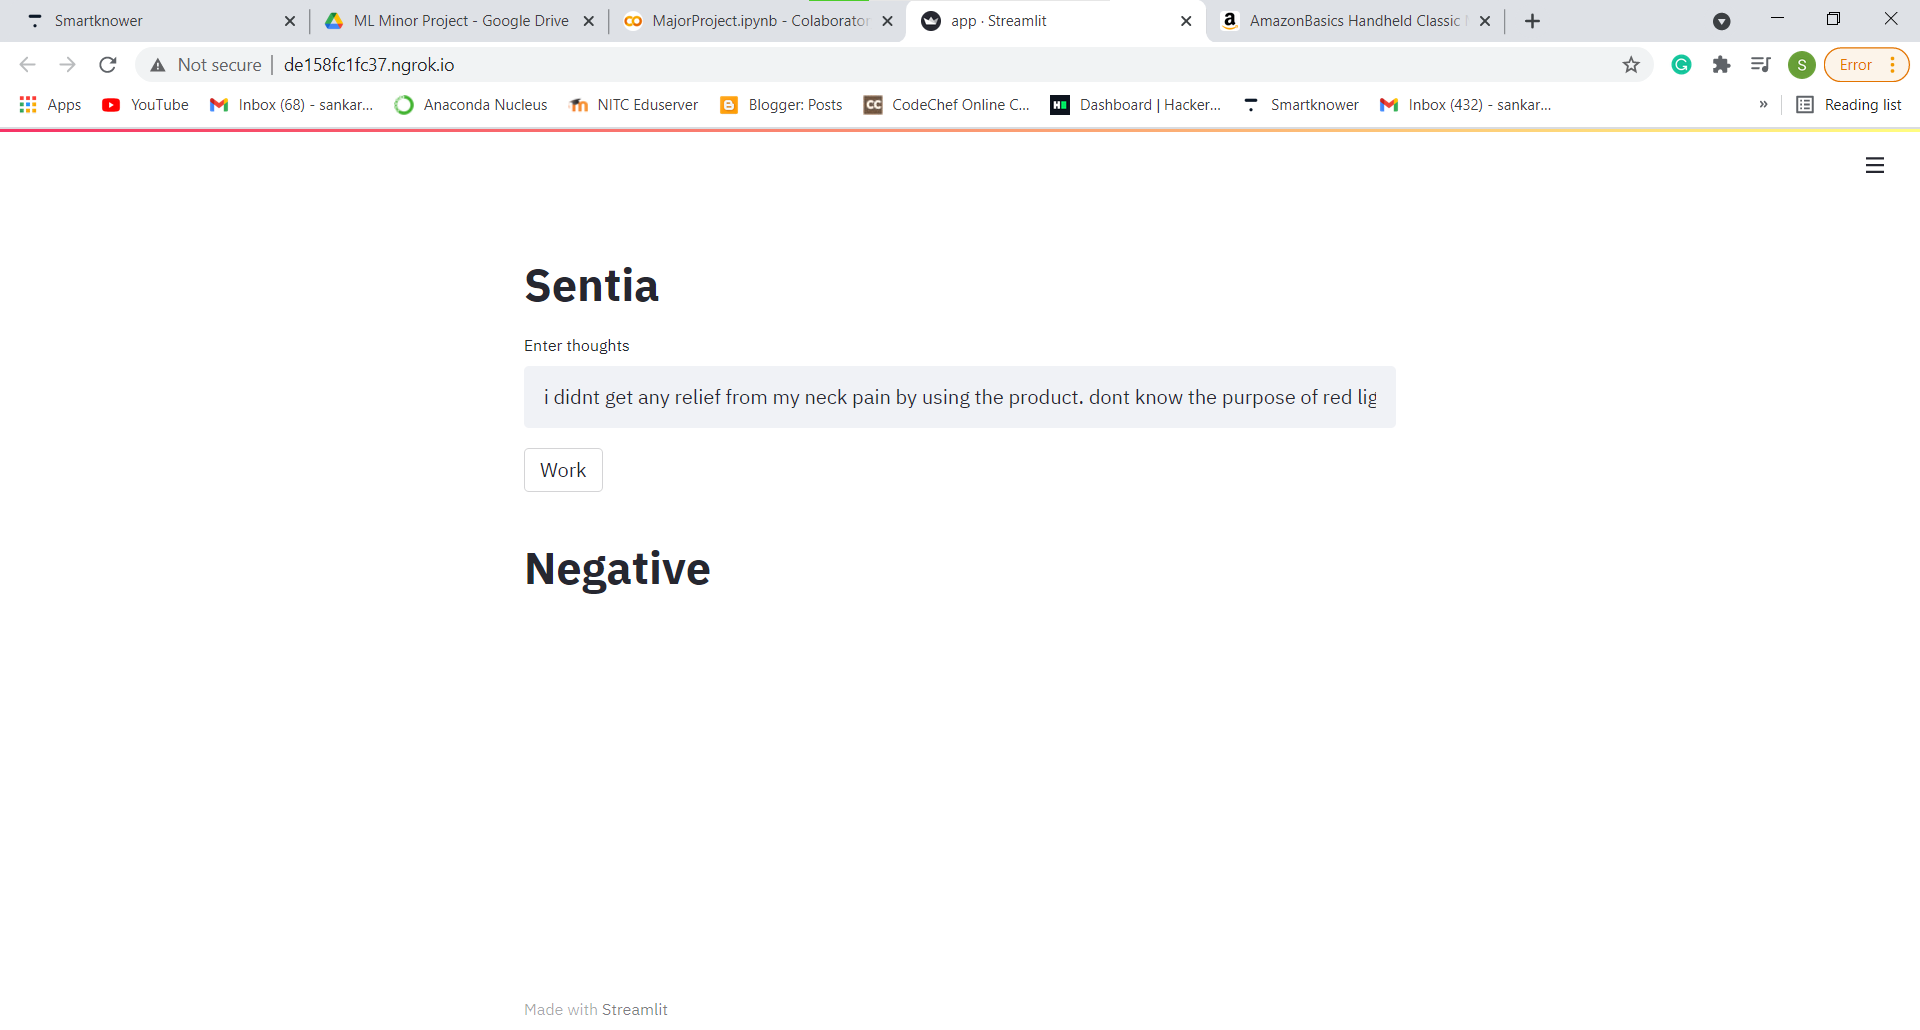

